# Exercise 02 : Bar

## Imports

In [1]:
import pandas as pd
import sqlite3

## Create a graph like in subject:
- analyze only the users and not the admins
- the fontsize and the figsize are still the same
- night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
- choose a palette that you really enjoy, you do not have to replicate it from the graph above

## Make a connection to the database

In [2]:
sql_con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get commits

In [3]:
query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

commits = pd.read_sql(query, sql_con, parse_dates=['datetime'])
commits

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## Calculating datetimes

In [17]:
commits['daytime'] = pd.cut(commits['datetime'].dt.hour,
                            bins=[-1, 4, 10, 17, 24],
                            labels=['night', 'morning', 'afternoon', 'evening'])
commits

,datetime,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


## Count comits per daytime

In [21]:
daytime_counts = commits.groupby(by=[commits['datetime'].dt.date, commits['daytime']]).count()
daytime_counts = daytime_counts.rename(columns={'datetime': 'count'})
daytime_counts = daytime_counts.unstack().droplevel(0, axis='columns')
daytime_counts.head()

daytime,night,morning,afternoon,evening
datetime,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16


## Creating graph

<AxesSubplot: title={'center': 'Commits per day'}, xlabel='datetime'>

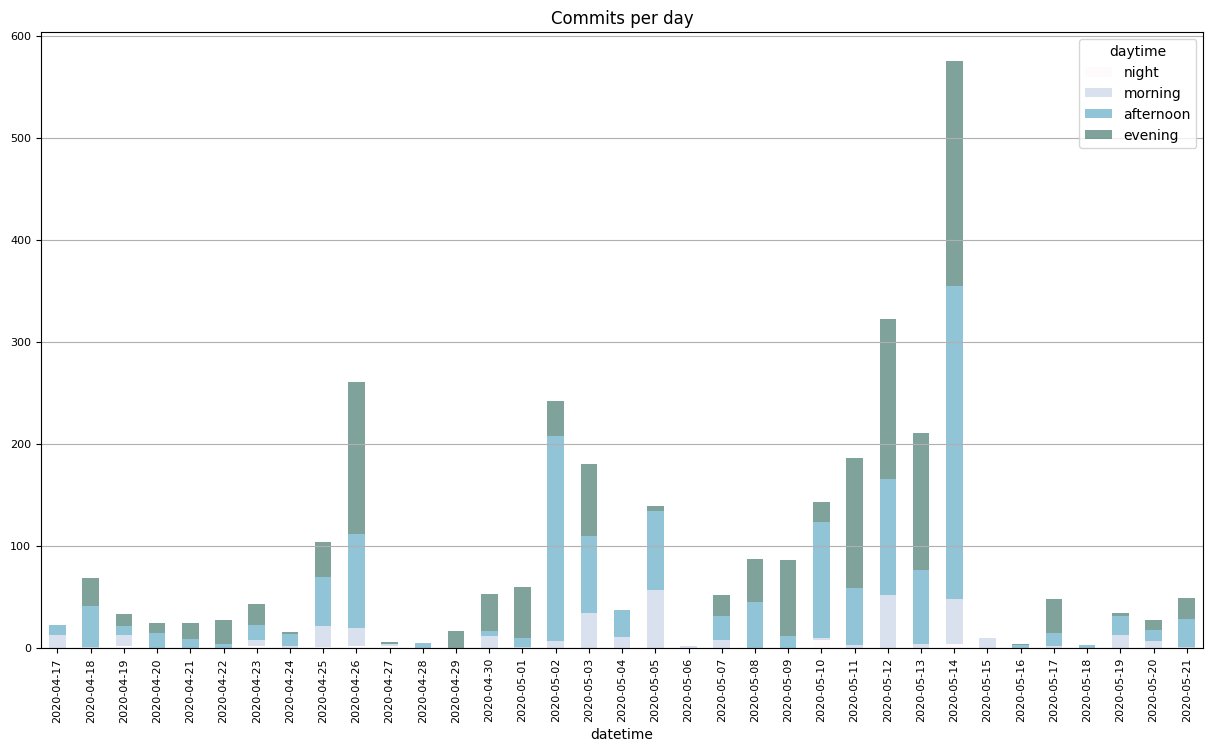

In [19]:
plt = daytime_counts.plot.bar(figsize=(15, 8),
                              fontsize=8,
                              title='Commits per day',
                              rot=90,
                              colormap='PuBuGn',
                              alpha=0.5,
                              stacked=True)
plt.grid(axis='y')
plt

## Close the connection to the database

In [22]:
sql_con.close()

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?
The answer is: afternoon, evening

## Which day has:
- the most number of commits
- and at the same time, the number of commits in the evening is higher than in the afternoon?

The anwser is: 2020-05-12